# recurrent_amplifications.ipynb
Count all oncogenes amplified in n >= 1 tumors. 

## TODO
- import data from data/Supplementary Tables.xlsx
- determine x-axis automatically instead of hard-coded in cancer_order variable
- determine y-axis automatically instead of hard-coded in chromosomal_gene_order variable

In [1]:
library(readxl)
library(ggplot2)
library(tidyverse)
library(janitor)
library(writexl)
library(cowplot)
library(extrafont)
library(svglite)

extrafont::font_import(pattern="Arial",prompt=FALSE)
extrafont::loadfonts()

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registering fonts with R

Scanning ttf file

In [2]:
# Specify file path and read in the sheets, using suppressWarnings to handle type warnings
file_path <- "Supplementary Tables.xlsx"  # Update with your actual file path

# Suppressing warnings for read_excel
gene_amplifications <- suppressWarnings(
  read_excel(file_path, sheet = "5. Gene amplifications", col_types = "guess")
)
biosamples <- suppressWarnings(
  read_excel(file_path, sheet = "2. Biosamples", col_types = "guess")
)

# Filter and rename 'sample_name' to 'biosample_id' for gene amplifications
ecDNA_amplicons <- gene_amplifications %>%
  filter(str_detect(feature, "ecDNA") & is_canonical_oncogene == TRUE)
 
biosamples <- biosamples %>% rename(sample_name = biosample_id)

# Merge with 'biosamples' based on 'biosample_id' and remove duplicates
merged_data <- ecDNA_amplicons %>%
  left_join(biosamples, by = "sample_name") %>%
  distinct()
ecDNA_amplicons <- merged_data
ecDNA_amplicons

sample_name,amplicon_number,feature,gene,gene_cn,truncated,is_canonical_oncogene,sex,patient_id,external_sample_id,⋯,age_at_diagnosis,cohort,extent_of_tumor_resection,file_name,cancer_type,cancer_subclass,ecDNA_sequences_detected,amplicon_class,in_unique_tumor_set,in_unique_patient_set
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<lgl>
BS_K3F9WTAN,amplicon1,ecDNA_1,ID2,36.37147356606734,NA,TRUE,Female,PT_0DM10YSE,7316-5523,⋯,5264,PBTA-X01,Gross/Near total resection,NA,HGG,HGG_H3WT,1,ecDNA,TRUE,TRUE
BS_K3F9WTAN,amplicon1,ecDNA_1,MYCN,37.960390544972,NA,TRUE,Female,PT_0DM10YSE,7316-5523,⋯,5264,PBTA-X01,Gross/Near total resection,NA,HGG,HGG_H3WT,1,ecDNA,TRUE,TRUE
BS_4FKXNJHW,amplicon1,ecDNA_1,MYCN,23.057119032732118,NA,TRUE,Male,PT_1A4HM6FR,7316-6980,⋯,2602,PBTA-X01,Gross/Near total resection,NA,MBL,G4,1,ecDNA,TRUE,TRUE
BS_MTYNW7BX,amplicon1,ecDNA_1,MYC,19.53688963749745,NA,TRUE,Male,PT_288PVQGZ,7316-4284,⋯,920,PBTA-X01,Gross/Near total resection,NA,MBL,G4,1,ecDNA,TRUE,TRUE
BS_MTYNW7BX,amplicon1,ecDNA_1,PVT1,56.72167389119923,3p,TRUE,Male,PT_288PVQGZ,7316-4284,⋯,920,PBTA-X01,Gross/Near total resection,NA,MBL,G4,1,ecDNA,TRUE,TRUE
BS_ERDKHKT5,amplicon1,ecDNA_1,ALK,11.399377639660615,NA,TRUE,Female,PT_28TM5WBD,7316-6885,⋯,3,PBTA-X01,NA,NA,HGG,IHG_ALK,1,ecDNA,TRUE,TRUE
BS_DYA4EMPF,amplicon1,ecDNA_1,AGAP2,37.426335593952096,3p,TRUE,Female,PT_2KB81GB1,7316-4310,⋯,8127,PBTA-X01,Partial resection,NA,HGG,HGG_IDH_TP53,1,ecDNA,TRUE,TRUE
BS_DYA4EMPF,amplicon1,ecDNA_1,CDK4,37.426335593952096,NA,TRUE,Female,PT_2KB81GB1,7316-4310,⋯,8127,PBTA-X01,Partial resection,NA,HGG,HGG_IDH_TP53,1,ecDNA,TRUE,TRUE
BS_4ZG27R47,amplicon1,ecDNA_1,CAV1,45.44402306036083,5p,TRUE,Female,PT_2KN2TFJP,7316-7680,⋯,6388,PBTA-X01,NA,NA,HGG,HGG_H3WT,1,ecDNA,TRUE,TRUE


In [32]:
gene_amplifications

sample_name,amplicon_number,feature,gene,gene_cn,truncated,is_canonical_oncogene
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
BS_K3F9WTAN,amplicon1,ecDNA_1,CALM2,35.349374196556305,NA,FALSE
BS_K3F9WTAN,amplicon1,ecDNA_1,EPCAM-DT,35.349374196556305,5p,FALSE
BS_K3F9WTAN,amplicon1,ecDNA_1,GACAT3,37.960390544972,NA,FALSE
BS_K3F9WTAN,amplicon1,ecDNA_1,HAAO,36.252738002676566,NA,FALSE
BS_K3F9WTAN,amplicon1,ecDNA_1,ID2,36.37147356606734,NA,TRUE
BS_K3F9WTAN,amplicon1,ecDNA_1,ID2-AS1,36.37147356606734,NA,FALSE
BS_K3F9WTAN,amplicon1,ecDNA_1,KIDINS220,36.37147356606734,NA,FALSE
BS_K3F9WTAN,amplicon1,ecDNA_1,MBOAT2,36.37147356606734,5p,FALSE
BS_K3F9WTAN,amplicon1,ecDNA_1,MTA3,36.252738002676566,5p,FALSE


In [3]:
#calculate total number of samples with amplification per gene per tumor type

count_gene_amps <- function(ac_tbl){
# Count gene amplifications from AmpliconClassifier output.
# Expects as input the columns "sample_ID" "sample_name" "amplicon_number" "amplicon_type" "gene" "gene_cn" "truncated" "cancer_type" "database"
# Returns: matrix of gene counts of size n_cancer_type x m_genes
  ac_tbl <- ac_tbl %>% 
    group_by(cancer_type, gene) %>% 
    summarize(count = n(), .groups="keep")
  colnames(ac_tbl) <- c("cancer_type","gene","total_frequency")
  ac_tbl <- ac_tbl %>%
    pivot_wider(
      names_from = cancer_type,
      values_from = total_frequency
    )
  return(ac_tbl)
}
# gene_freq_all_amplicons <- count_gene_amps(deduplicated_amplicons)
gene_freq_ecDNA <- count_gene_amps(ecDNA_amplicons)
gene_freq_ecDNA

gene,ACC,CPG,EMBT,EPN,ETMR,GCT,GNT,HGG,LGG,⋯,MEL,MST,NBL,OST,PINT,PNST,RBL,RMS,SARC,WLM
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
INPPL1,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NUMA1,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SPI1,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MET,NA,1,NA,NA,NA,NA,NA,8,NA,⋯,NA,NA,NA,NA,NA,1,NA,NA,NA,NA
WNT2,NA,1,NA,NA,NA,NA,NA,5,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AGAP2,NA,NA,2,NA,NA,NA,NA,13,NA,⋯,NA,1,NA,6,NA,1,NA,1,NA,NA
BTG1,NA,NA,1,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,1,NA,NA
CCND2,NA,NA,2,NA,NA,NA,NA,3,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CDK4,NA,NA,2,NA,NA,NA,NA,13,NA,⋯,NA,1,NA,6,NA,1,NA,1,NA,NA


In [4]:
# Subset recurrently ecDNA-amplified oncogenes

subset_recurrently_ecDNA_amp_genes <- function(freq_tbl){
  # tbl should be genes (rows) x tumor types (cols). See count_gene_amps.
  rowsums <- tibble(freq_tbl$gene, rowSums(freq_tbl[,-1], na.rm = TRUE))
  colnames(rowsums) <- c("gene","count")
  rowsums <- rowsums %>% 
    filter(count > 1)
  freq_tbl <- freq_tbl %>% 
    filter(gene %in% rowsums$gene) %>%
    janitor::remove_empty(which = "cols")
  return(freq_tbl)
}

gene_x_tumor_amp_freq <- gene_freq_ecDNA %>% 
  subset_recurrently_ecDNA_amp_genes()
gene_x_tumor_amp_freq

gene,CPG,EMBT,EPN,ETMR,GCT,GNT,HGG,LGG,MBL,MEL,MST,NBL,OST,PINT,PNST,RBL,RMS,SARC,WLM
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
MET,1,NA,NA,NA,NA,NA,8,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA
WNT2,1,NA,NA,NA,NA,NA,5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AGAP2,NA,2,NA,NA,NA,NA,13,NA,NA,NA,1,NA,6,NA,1,NA,1,NA,NA
BTG1,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA
CCND2,NA,2,NA,NA,NA,NA,3,NA,6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CDK4,NA,2,NA,NA,NA,NA,13,NA,NA,NA,1,NA,6,NA,1,NA,1,NA,NA
CNOT3,NA,1,NA,4,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,1,NA,NA
DDIT3,NA,2,NA,NA,NA,NA,6,NA,NA,NA,1,NA,3,NA,1,NA,1,NA,NA
FGF6,NA,2,NA,NA,NA,NA,3,NA,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [5]:
# Get all column names
colnames(ecDNA_amplicons)


[1] "sample_name"               "amplicon_number"          
 [3] "feature"                   "gene"                     
 [5] "gene_cn"                   "truncated"                
 [7] "is_canonical_oncogene"     "sex"                      
 [9] "patient_id"                "external_sample_id"       
[11] "tumor_history"             "age_at_diagnosis"         
[13] "cohort"                    "extent_of_tumor_resection"
[15] "file_name"                 "cancer_type"              
[17] "cancer_subclass"           "ecDNA_sequences_detected" 
[19] "amplicon_class"            "in_unique_tumor_set"      
[21] "in_unique_patient_set"

In [6]:
get_x_barplot_data <- function(sort="frequency"){
  # Count amplicons represented in each column. Note this is not a column sum of the heatmap, since an
  # amplification may have more than one amplified oncogene.
  tumor_amp_freq <- ecDNA_amplicons %>%
  filter(gene %in% gene_x_tumor_amp_freq$gene) %>%
  distinct(sample_name, .keep_all = TRUE) %>%
  group_by(cancer_type) %>%
  summarize(count = n()) #%>%
  # sort by ecDNA frequency, excluding other
  last_row <- tumor_amp_freq %>% slice_tail(n = 1)
  tumor_amp_freq <- tumor_amp_freq %>%
  slice_head(n = -1) %>%  # Exclude the last row
  arrange(-count) %>%       # Sort by the "Value" column
  bind_rows(last_row)      # Append the last row
  return(tumor_amp_freq)
}
get_y_barplot_data <- function(){
  # Count genes represented in each row
  gene_amp_freq <- tibble(gene_x_tumor_amp_freq$gene, rowSums(gene_x_tumor_amp_freq[,-1], na.rm = TRUE))
  colnames(gene_amp_freq) <- c("gene","count")
  gene_amp_freq <- gene_amp_freq %>% 
    #mutate(gene = factor(gene, levels=chromosomal_gene_order)) %>%
    arrange(count)
  return(gene_amp_freq)
}
## Sort by frequency
sort_heatmap_data <- function(hmd){
  # sort by column sums, keeping gene as first and other as last.
  ##column_sums <- c(Inf, colSums(hmd %>% ungroup() %>% select(-1, -ncol(hmd)), na.rm=TRUE),0) 
  ord <- get_x_barplot_data()$cancer_type
  # sort by rows
  row_sums <- rowSums(hmd %>% ungroup() %>% select(where(is.numeric)), na.rm=TRUE)
  return(hmd %>%
    select(all_of(ord)) %>% # Sort the tibble by order in x barplot
    arrange(row_sums) # Sort the tibble by decreasing row sums
    )
}
get_heatmap_data <- function(){
  gene_x_tumor_frequencytable   <- gene_x_tumor_amp_freq %>% 
    sort_heatmap_data %>%
    tidyr::pivot_longer(
      cols = NBL:SARC,
      names_to = c("cancer_type"),
      values_to = "count"
    ) #%>%
    #mutate(cancer_type = factor(cancer_type)) %>%
    #mutate(gene = factor(gene)) %>%
    #arrange(gene)
  return(gene_x_tumor_frequencytable)
}


cancer_order <- c("NBL","OST","RMS","ETMR","RBL", "EMBT", "EPN", "GCT", "MST", "PNST", "SARC")
chromosomal_gene_order <- c("MYCN", "CDK4", "AGAP2", "MYC", "PDGFRA", "PVT1", "CHIC2", "MDMD2", "YEATS4", "DDIT3", 
                           "GLI1", "KIT", "FIP1L1", "KDR", "CCND2", "MET", "SREBF1", "EGFR", "CDK6", "LRIG3", "IFNG", "FGF6",
                           "CNOT3", "TERT", "ID2", "COPS3", "TFPT", "WNT2", "CCNE1", "PPM1D", "GLI2", "AKAP9", "PLAG1",
                           "TFEB", "YAP1", "TRIB1", "PLAGL2", "MYCL", "MMP12", "BIRC3", "BIRC2", "TBC1D15", "LDHB", "HMGA2", 
                           "PAX7", "FOXO1", "RAD21", "INTS2", "FHL2", "BRIP1", "BRD4", "YWHAQ", "WIF1", "TRIB2", "NDRG1", "IGF1R",
                           "GAS7", "FLT3", "CCN4", "CAV1", "RRAS2", "KRAS","ETV6", "RB1", "PCM1", "DNPH1", "CFC5L", "CCND3",
                           "RUNX11", "IRS2", "GATA6", "CDK14", "TRIM33", "NUAK2", "NRAS", "MYB", "MSH6", "MSH2", "MDM4", "ITGA3",
                           "ID1", "FGF4", "FBXO11", "EPCAM", "CNTN2", "CDX2", "CCND1", "BCL2L1", "ASXL1", "ALK", "BTG1") %>% rev

In [37]:
plot_gene_x_tumor_heatmap <- function(subpanel=FALSE){
  if(subpanel){
    plot_tag <- element_text(size=8,face = "bold", colour = "black")
    tag="b"
  }else{
    plot_tag <- NULL
    tag=NULL
  }
  mapping <- aes(x = fct_inorder(cancer_type), y = fct_inorder(gene), fill = count) 
  hm <- ggplot(data=get_heatmap_data(), mapping=mapping) +
    geom_raster() +
    #scale_fill_distiller(name = "Patient tumor count", palette = "Blues", direction = 1, na.value = "white", trans = 'log10', ) +
    scale_fill_gradient(name = "Patient tumor count", na.value="white", trans = 'log10',  low="skyblue",high="darkblue") +
    scale_x_discrete() + 
    labs(x="Tumor type", y="Oncogene", tag=tag) +
    theme_classic(base_size=7, base_family="Arial",) +
    theme(axis.text = element_text(size=7,colour="black"),
          axis.text.x = element_text(angle=45,vjust=0.5),
          plot.tag = plot_tag,
          legend.position = "bottom", 
          legend.direction = "horizontal",
          legend.key.size = unit(1,"cm"),
          ) 
  return(hm)
}

hm <- plot_gene_x_tumor_heatmap()
leg <- cowplot::get_legend(hm)
hm.clean <- hm + theme(legend.position="none")
ggsave("out/heatmap_with_legend.svg", plot = hm, width = 12, height = 8)
# Generate the heatmap

# Explicitly check for cowplot package and load
if (!requireNamespace("cowplot", quietly = TRUE)) {
  install.packages("cowplot")
}






Adding missing grouping variables: `gene`
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


Adding missing grouping variables: `gene`
Legend saved successfully as SVG.



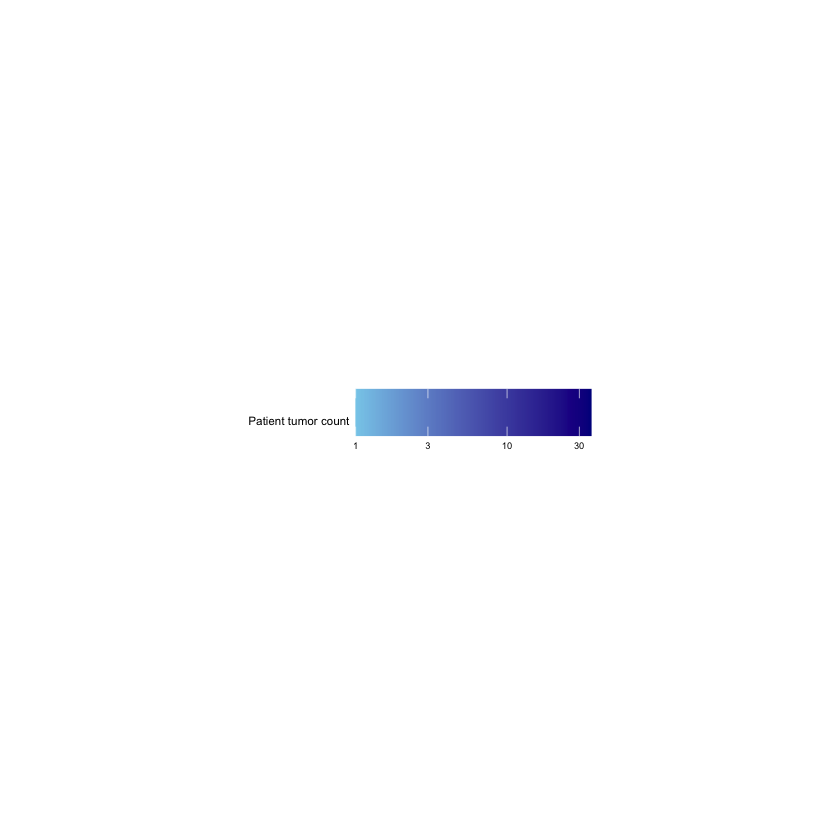

In [38]:
# Load necessary packages
library(ggplot2)
library(gtable)
library(grid)

# Function to extract and save legend as SVG
get_and_save_legend <- function(myplot, file_name) {
  # Convert ggplot to gtable object
  plot_gtable <- ggplotGrob(myplot)
  
  # Locate the legend (guide-box) in gtable
  guide_grob <- plot_gtable$grobs[which(sapply(plot_gtable$grobs, function(x) x$name) == "guide-box")]
  
  if (length(guide_grob) > 0) {
    legend_grob <- guide_grob[[1]]
    
    # Create a new blank page and draw only the legend
    grid.newpage()
    grid.draw(legend_grob)
    
    # Save the legend to the specified SVG file
    ggsave(file_name, plot = legend_grob, width = 3, height = 1, device = "svg")  # Adjust width and height as needed
    message("Legend saved successfully as SVG.")
  } else {
    message("Legend extraction failed: No legend found in the plot.")
  }
}

# Generate the heatmap plot and save the legend
hm <- plot_gene_x_tumor_heatmap()
get_and_save_legend(hm, "out/legend_only.svg")


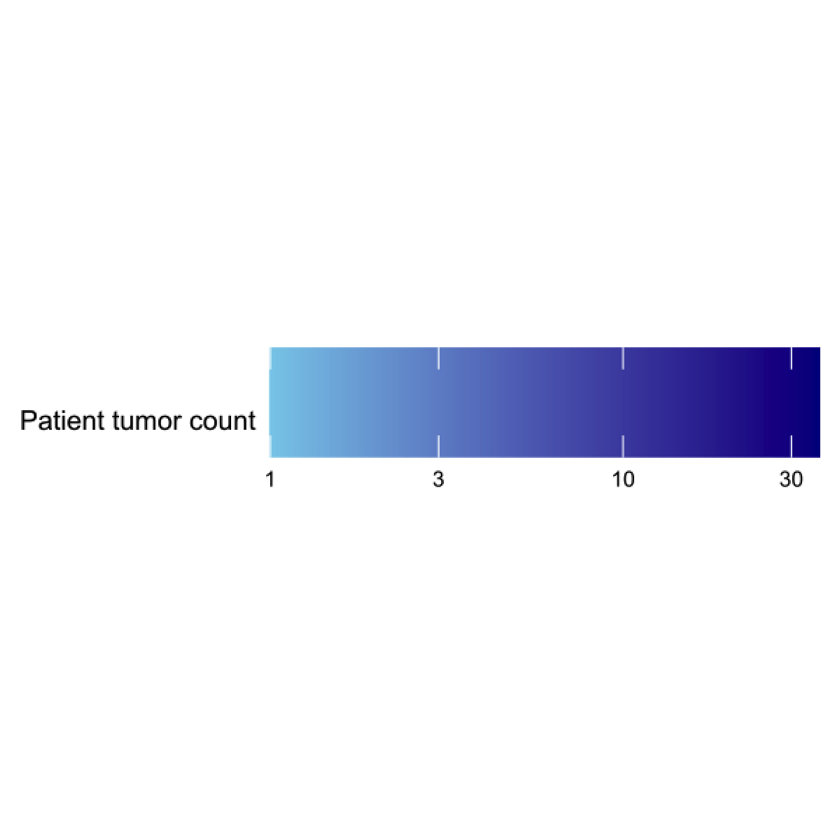

In [43]:
library(cowplot)
library(magick)
library(ggplot2)

# Load the SVG and convert it into a raster graphic for ggplot2
leg_svg <- image_read_svg("out/legend_only.svg", width = 600)  # Adjust width as needed

# Scale the image to increase its resolution
leg_svg <- image_scale(leg_svg, "200%")  # Scale up by 200%

# Create a ggdraw object with the scaled image and add a caption
leg <- ggdraw() + 
  draw_image(leg_svg) 

leg


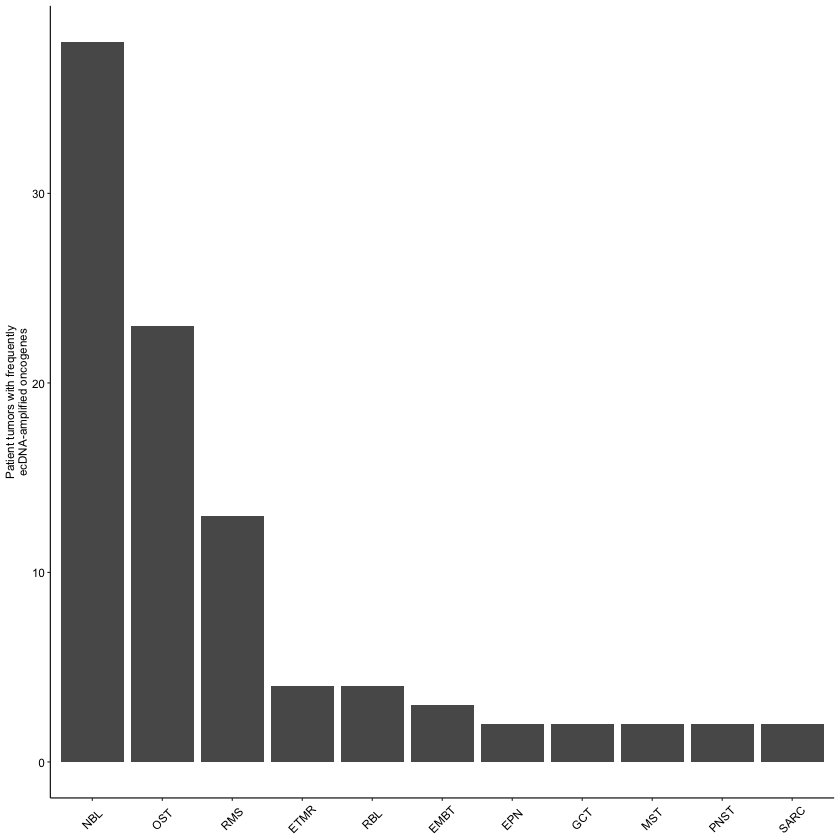

In [17]:
# Create x axis barplot
x_barplot <- function(cancer_order, color=FALSE, labels=FALSE, subpanel=FALSE) {
  # Get the data
  data <- get_x_barplot_data()
  
  # Filter data to only include cancer types in cancer_order
  data <- data[data$cancer_type %in% cancer_order, ]
  
  # Reorder cancer_type by count in descending order
  data$cancer_type <- factor(data$cancer_type, levels = cancer_order[cancer_order %in% data$cancer_type])
  
  # Color the bars or not
  if(color) {
    mapping <- aes(x = cancer_type, y = count, fill = count)
  } else {
    mapping <- aes(x = cancer_type, y = count)
  }
  
  # Label the y axis or not
  if(labels) {
    axis_text_x <- element_text(angle=45, vjust=0.5)
    axis_ticks_x <- NULL
  } else {
    axis_text_x <- element_blank()
    axis_ticks_x <- element_blank()
  }
  
  # Include subpanel labelling a, b, c etc.
  if(subpanel) {
    plot_tag <- element_text(size=8, face = "bold", colour = "black")
    tag = "a"
  } else {
    plot_tag <- NULL
    tag = NULL
  }
  
  # Create the bar plot
  bp.x <- ggplot(data = data, mapping = mapping) + 
    geom_bar(stat = "identity", mapping) + 
    theme_classic(base_size=7, base_family="Arial") + 
    theme(
      axis.text = element_text(colour="black", size=7),
      plot.tag = plot_tag,
      axis.text.x = axis_text_x,
      axis.title.x = element_blank(),
      axis.ticks.x = axis_ticks_x,
      legend.position = "none") + 
    scale_fill_distiller(name = "Value", palette = "Blues", direction = 1, trans = 'log10') + 
    labs(x = "Cancer Type", y = "Patient tumors with frequently\necDNA-amplified oncogenes", tag=tag)
  
  return(bp.x)
}

# Generate the bar plot with specified cancer order
bp.x <- x_barplot(cancer_order, color=FALSE, labels=TRUE)

# Save the plot as SVG
ggsave("cancer_type_barplot.svg", plot = bp.x, width = 12, height = 8)  # Adjust width and height as needed

# Display the plot
bp.x


Warning message in geom_col(stat = "identity", mapping = mapping):
“Ignoring unknown parameters: `stat`”


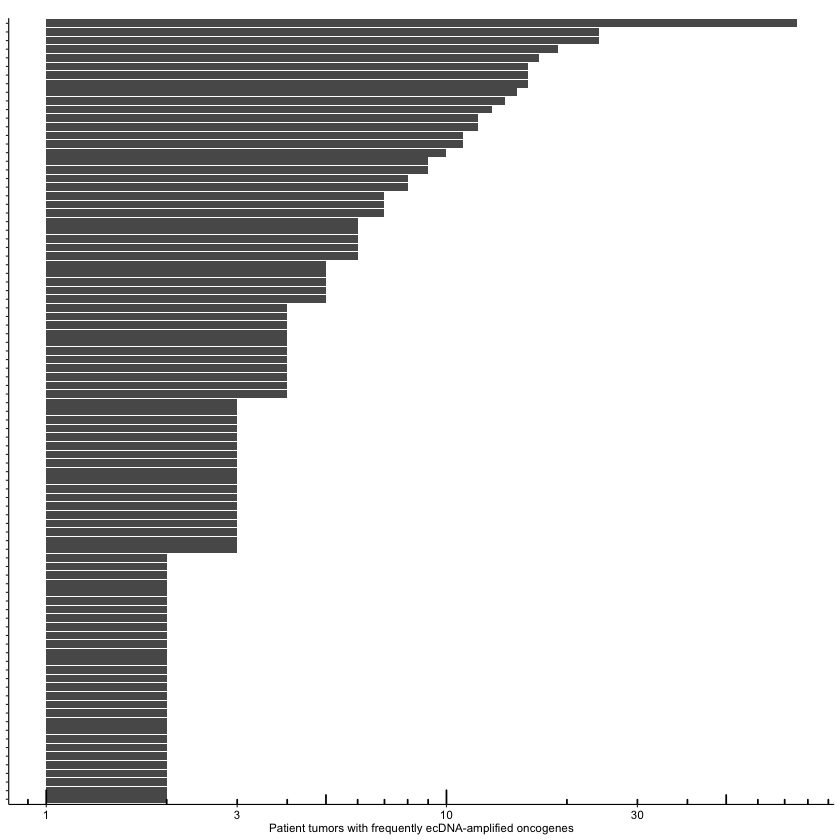

In [15]:
# Create y axis barplot
y_barplot <- function(color=FALSE, labels=FALSE, subpanel=FALSE){
  # Color the bars or not
  if(color){
    mapping <- aes(x = count, y = fct_inorder(gene), fill = count)
  }else{
    mapping <- aes(x = count, y = fct_inorder(gene))
  }
  # label the y axis or not
  if(labels){
    axis_text_y <- NULL
    axis_ticks_y <- NULL
  }else{
    axis_text_y <- element_blank()
    axis_ticks_y <- element_blank()
  }
  # include subpanel labelling a, b, c etc.
  if(subpanel){
    plot_tag <- element_text(size=8,face = "bold", colour = "black")
    tag=""
  }else{
    plot_tag <- NULL
    tag=NULL
  }
  
  bp.y <- ggplot(data = get_y_barplot_data(), mapping=mapping) + 
    geom_col(stat = "identity", mapping=mapping) + 
    scale_x_log10() +
    annotation_logticks(sides='b') +
    theme_classic(base_size=7, base_family="Arial") + 
    theme(
      axis.text = element_text(colour="black",size=7),
      plot.tag = plot_tag,
      axis.text.y = element_blank(),
      axis.title.y = element_blank(),
      axis.ticks.y = axis_ticks_y,
      legend.position = "none") + 
    scale_fill_distiller(name = "Value", palette = "Blues", direction = 1, trans = 'log10' ) + 
    labs(x = "Patient tumors with frequently ecDNA-amplified oncogenes", tag=tag)
  return(bp.y)
}
bp.y <- y_barplot(color=FALSE,labels=TRUE,subpanel=TRUE)
ggsave("gene_barplot.svg", plot = bp.y, width = 8, height = 8)  # Adjust width and height as needed
bp.y

Warning message in geom_col(stat = "identity", mapping = mapping):
“Ignoring unknown parameters: `stat`”


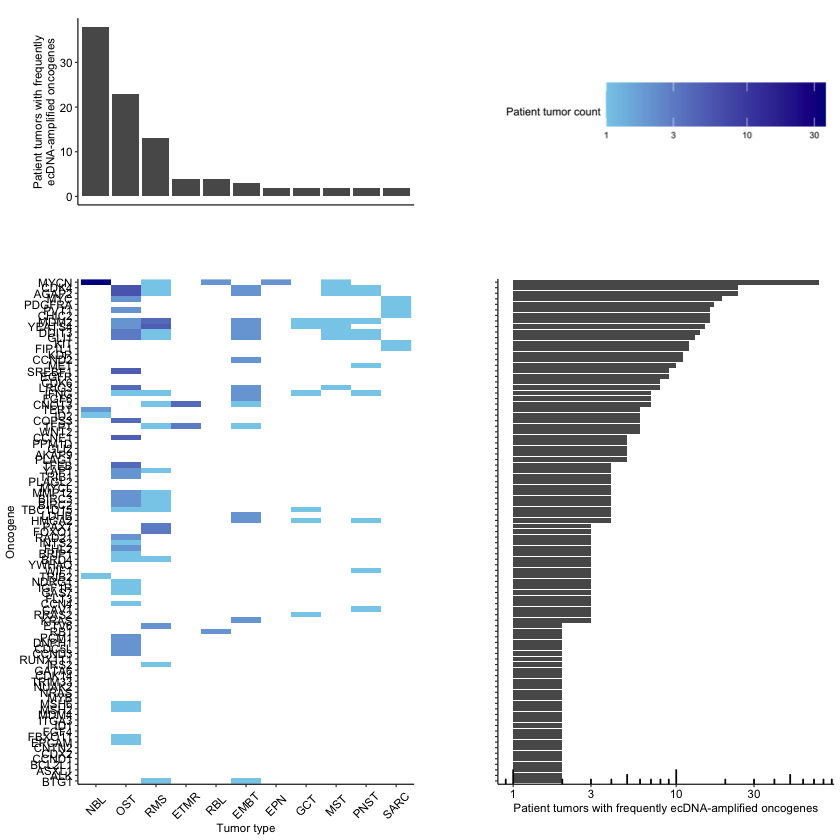

In [49]:
library(ggplot2)
library(cowplot)  # Ensure cowplot is loaded
library(forcats)  # For factor manipulation

# Existing function to create the heatmap (assumed to be defined already)

# Assemble the plots
assemble_plot <- function(){
  cowplot::plot_grid(
    bp.x, leg, hm.clean, bp.y,
    align = "hv",
    axis = "lrbt",
    nrow=2,
    ncol=2,
    rel_heights=c(0.9,2)
  )
}

# Generate and display the bar plots
bp.x <- x_barplot(cancer_order)
bp.y <- y_barplot(color=FALSE, labels=TRUE, subpanel=TRUE)

# Assemble and save the plot
final_plot <- assemble_plot()
# ggsave(filename="amplicon_plot_grey_bar.png", path="out", plot = final_plot, dpi=300, width=7, height=7, units="in", bg="white")
ggsave(filename="amplicon_plot_grey_bar_v4.svg", path="out", plot = final_plot, dpi=300, width=7, height=11, units="in")
final_plot

In [34]:
write_outputs <- function(filename){
  outdir <- file.path("out")
  dir.create(outdir, showWarnings = FALSE)
  path <- file.path(outdir,filename)
  write_xlsx(list(gene_x_tumor_amp_freq = get_heatmap_data(), 
                  tumor_amp_freq = get_x_barplot_data(),
                  gene_amp_freq = get_y_barplot_data()),
             path=path)
}
write_outputs('PedPanCanAmpliconAnalysisOutputs.xlsx')

Adding missing grouping variables: `gene`
